# Análise de dados sobre obesidade

## Obesidade 
A obesidade é uma condição médica caracterizada pelo acúmulo excessivo de gordura corporal, que pode ter impactos negativos na saúde. Ela é geralmente definida em termos de índice de massa corporal (IMC), que é calculado dividindo o peso da pessoa pelo quadrado da sua altura (kg/m²). De acordo com a Organização Mundial da Saúde (OMS), um IMC igual ou superior a 30 indica obesidade.

A obesidade é influenciada por uma variedade de fatores, incluindo estilo de vida, genética, ambiente e saúde mental. O tratamento da obesidade geralmente envolve uma combinação de mudanças na dieta, aumento da atividade física, terapia comportamental e, em alguns casos, medicamentos ou cirurgia. A prevenção da obesidade geralmente se concentra em promover estilos de vida saudáveis desde a infância, incluindo alimentação equilibrada e atividade física regular.

Neste contexto, a análise se concentra em dados relacionados à obesidade, uma condição médica globalmente prevalente e de crescente preocupação de saúde pública. Por meio de um banco de dados abrangente, busca-se entender melhor os padrões, tendências e fatores associados à obesidade em diferentes populações.

## Informações do conjunto de dados

Este conjunto de dados contém informações sobre a estimativa dos níveis de obesidade em pessoas dos países México, Peru e Colômbia. Essas estimativas são baseadas nos hábitos alimentares e na condição física dos indivíduos. Os dados consistem em 17 características diferentes e incluem um total de 2111 registros. Cada registro está associado a uma variável de classe chamada NObesity (Nível de Obesidade), que permite classificar os dados de acordo com diferentes categorias de peso: Peso Insuficiente, Peso Normal, Sobrepeso Nível I, Sobrepeso Nível II, Obesidade Tipo I, Obesidade Tipo II e Obesidade Tipo III. Cerca de 77% dos dados foram gerados sinteticamente usando a ferramenta Weka e o filtro SMOTE, enquanto os 23% restantes foram coletados diretamente dos usuários por meio de uma plataforma web.

#### Instalação e Importação de bibliotecas

In [1]:
!pip install pandas

In [2]:
!pip install matplotlib 

In [11]:
import seaborn as sns

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#### Importação dos dados

In [19]:
df = pd.read_csv(r"C:\Users\Jessica\OneDrive\Área de Trabalho\Dados\Projeto - Obesidade\ObesityDataSet_raw_and_data_sinthetic.csv")
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## 1. Análise Descritiva
#### Análise descritiva para entender a distribuição das variáveis em relação à idade, gênero e uma visão superficial de quantidade de acordo com diferentes categorias de peso. 

In [9]:
#Mostrar a quantidade de homens e mulheres participantes da pesquisa

homens = df[df['Gender'] == 'Male'].shape[0]
mulheres = df[df['Gender'] == 'Female'].shape[0]

print("Quantidade de Homens:", homens)
print("Quantidade de Mulheres:", mulheres)

Quantidade de Homens: 1068
Quantidade de Mulheres: 1043


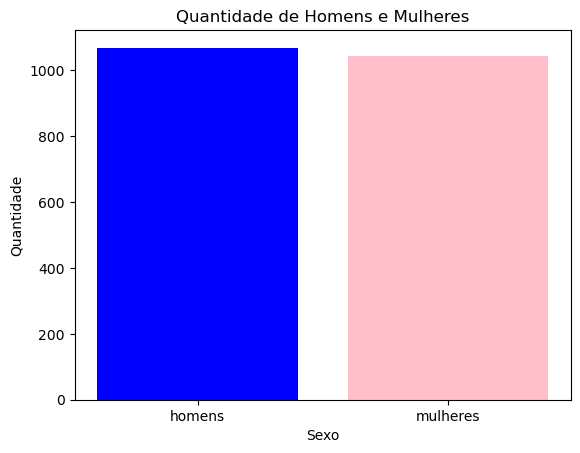

In [10]:
# Quantidades de cada sexo no gráfico

import matplotlib.pyplot as plt

gender = ['homens', 'mulheres']

# Quantidades de cada sexo
quantidades = [homens, mulheres]

plt.bar(gender, quantidades, color=['blue', 'pink'])

plt.title('Quantidade de Homens e Mulheres')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')

plt.show()

O número de participantes masculinos e femininos está bastante equilibrado, com uma diferença de apenas 25 pessoas (aproximadamente 1,2%). Esse número sugere que a amostra é equilibrada, o que pode reduzir viés de gênero nos resultados.


In [11]:
# Contar a quantidade 
normal = df[df['NObeyesdad'] == 'Normal_Weight'].shape[0]
primeiro_grau = df[df['NObeyesdad'] == 'Overweight_Level_I'].shape[0]
segundo_grau = df[df['NObeyesdad'] == 'Overweight_Level_II'].shape[0]
obesidade_primeiro = df[df['NObeyesdad'] == 'Obesity_Type_I'].shape[0]
obesidade_segundo = df[df['NObeyesdad'] == 'Obesity_Type_II'].shape[0]
obesidade_terceiro = df[df['NObeyesdad'] == 'Obesity_Type_III'].shape[0]

# Imprimir as quantidades
print("Peso normal:", normal)
print("Sobrepeso nível I:", primeiro_grau)
print("Sobrepeso nível II:", segundo_grau)
print("Obesidade nível 1:", obesidade_primeiro)
print("Obesidade nível 2:", obesidade_segundo)
print("Obesidade nível 3:", obesidade_terceiro)

Peso normal: 287
Sobrepeso nível I: 290
Sobrepeso nível II: 290
Obesidade nível 1: 351
Obesidade nível 2: 297
Obesidade nível 3: 324


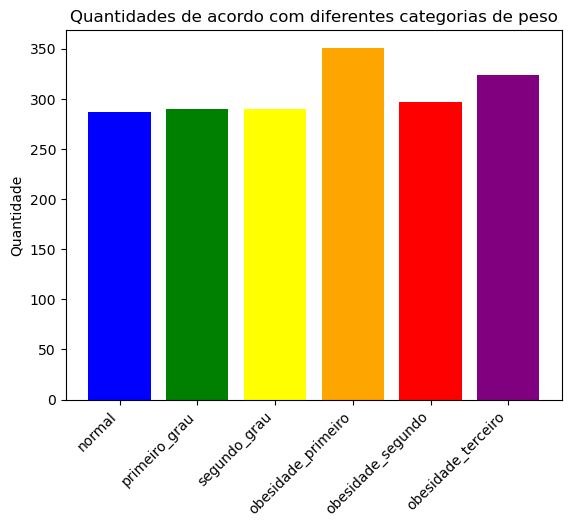

In [41]:
# Quantidades de acordo com diferentes categorias de peso no gráfico

import matplotlib.pyplot as plt

NObeyesdad = ['normal', 'primeiro_grau', 'segundo_grau', 'obesidade_primeiro', 'obesidade_segundo', 'obesidade_terceiro']

# Quantidades de cada sexo
quantidades = [normal, primeiro_grau, segundo_grau, obesidade_primeiro, obesidade_segundo, obesidade_terceiro]

plt.bar(NObeyesdad, quantidades, color=['blue', 'green', 'yellow', 'orange', 'red', 'purple' ])

plt.title('Quantidades de acordo com diferentes categorias de peso')

plt.ylabel('Quantidade')

plt.xticks(rotation=45, ha='right')

plt.show()

A distribuição dos participantes por categorias de peso sugere algumas tendências importantes sobre o estado nutricional da amostra. 
Apenas 287 pessoas (aproximadamente 16%) estão dentro da faixa considerada 'Peso Normal'. Isso indica uma alta prevalência de excesso de peso na amostra.

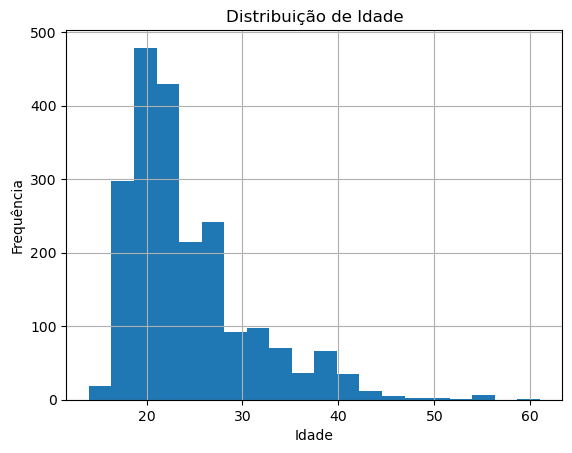

In [12]:
df['Age'].hist(bins=20)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

A predominância de entrevistados na faixa dos 20 anos indica que a pesquisa pode estar capturando uma perspectiva jovem sobre o tema em questão. Isso pode ser positivo se o objetivo for entender o comportamento de consumidores ou jovens adultos, mas deve ser considerado no contexto de eventuais limitações ou viéses se a amostra não for suficientemente diversificada.
Considerando os resultados alarmantes relacionados ao sobrepeso e obesidade em uma amostra predominante de entrevistados na casa dos 20 anos, essa alta prevalência entre jovens adultos é preocupante, pois jovens dessa faixa etária geralmente estão no início da vida adulta, fase em que se formam hábitos alimentares e de estilo de vida que podem perdurar por toda a vida, sugerindo que uma parte significativa da população jovem pode estar em risco elevado de doenças crônicas no futuro.

## 2. Análise de Correlação
#### Correlação entre as variáveis numéricas.

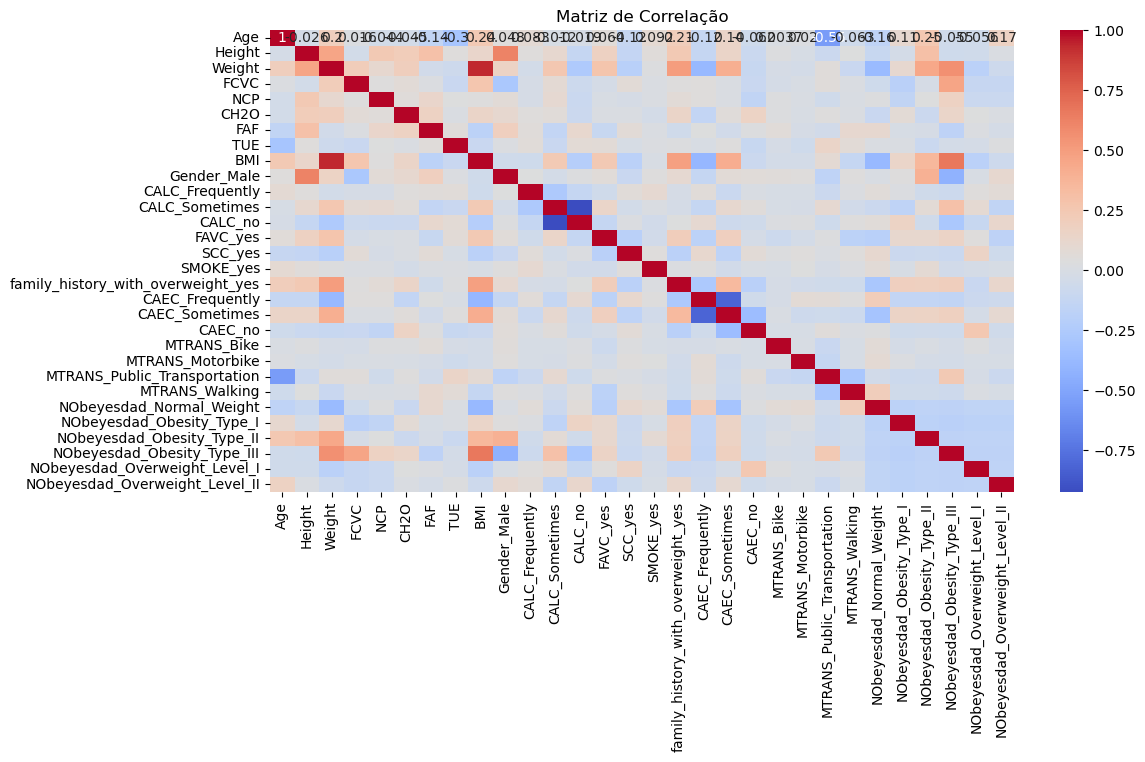

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Converter variáveis categóricas em variáveis dummy
df_dummies = pd.get_dummies(df, drop_first=True)

# Matriz de correlação
plt.figure(figsize=(12, 6))
correlation_matrix = df_dummies.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

## 3. Análise de Comportamentos e Hábitos
#### Explorando a relação entre comportamentos/hábitos (como consumo de alimentos, atividade física, etc.) e a obesidade.


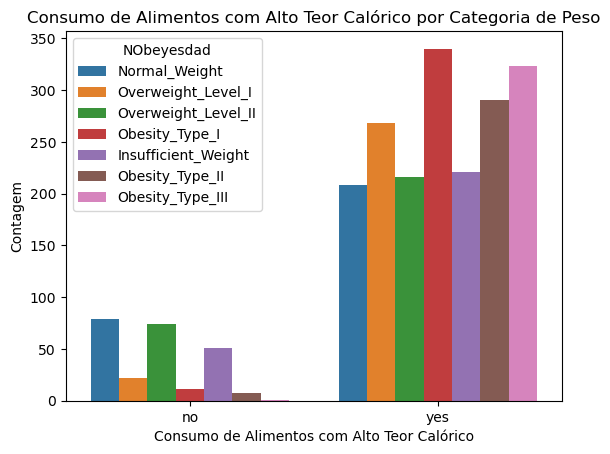

In [12]:
# Consumo de alimentos com alto teor calórico (FAVC)
normal = df[df['NObeyesdad'] == 'Normal_Weight'].shape[0]
primeiro_grau = df[df['NObeyesdad'] == 'Overweight_Level_I'].shape[0]
segundo_grau = df[df['NObeyesdad'] == 'Overweight_Level_II'].shape[0]
obesidade_primeiro = df[df['NObeyesdad'] == 'Obesity_Type_I'].shape[0]
obesidade_segundo = df[df['NObeyesdad'] == 'Obesity_Type_II'].shape[0]
obesidade_terceiro = df[df['NObeyesdad'] == 'Obesity_Type_III'].shape[0]

sns.countplot(x='FAVC', hue='NObeyesdad', data=df)

plt.title('Consumo de Alimentos com Alto Teor Calórico por Categoria de Peso')
plt.xlabel('Consumo de Alimentos com Alto Teor Calórico')
plt.ylabel('Contagem')

plt.show()

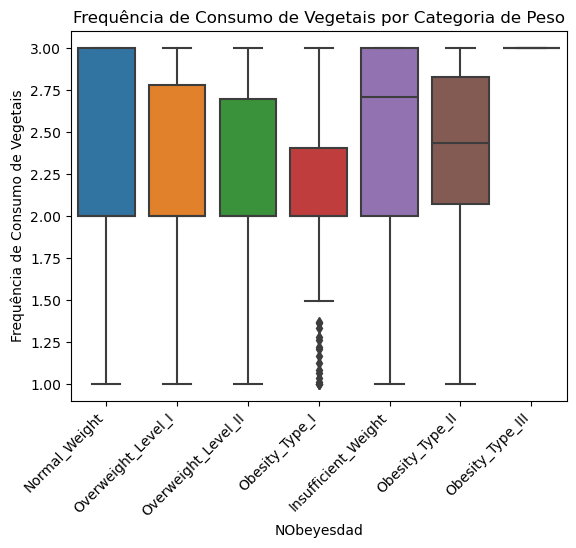

In [52]:
# Frequência de consumo de vegetais (FCVC)
sns.boxplot(x='NObeyesdad', y='FCVC', data=df)
plt.title('Frequência de Consumo de Vegetais por Categoria de Peso')

plt.ylabel('Frequência de Consumo de Vegetais')

plt.xticks(rotation=45, ha='right')

plt.show()

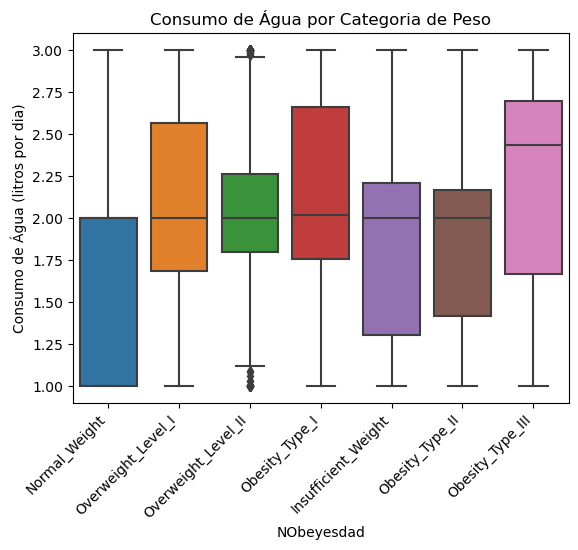

In [63]:
# Consumo de água (CH2O)
sns.boxplot(x='NObeyesdad', y='CH2O', data=df)
plt.title('Consumo de Água por Categoria de Peso')

plt.ylabel('Consumo de Água (litros por dia)')
plt.xticks(rotation=45, ha='right')
plt.show()

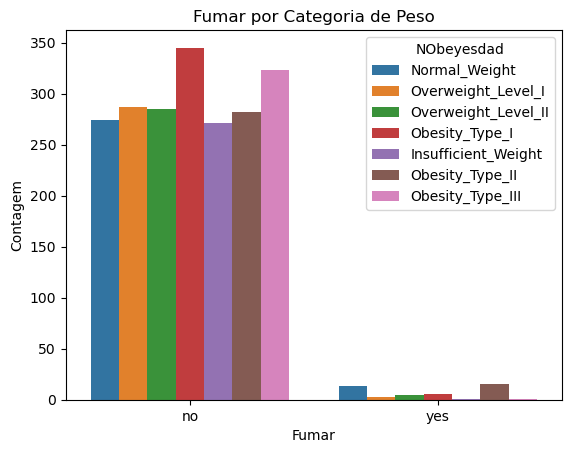

In [13]:
# Fumar por categoria de peso
sns.countplot(x='SMOKE', hue='NObeyesdad', data=df)
plt.title('Fumar por Categoria de Peso')
plt.xlabel('Fumar')
plt.ylabel('Contagem')
plt.show()

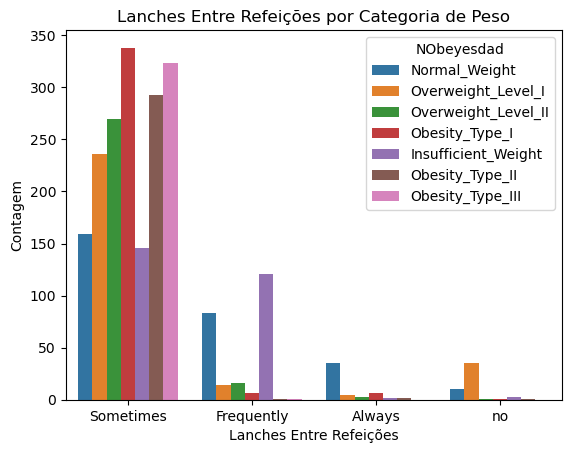

In [14]:
# Lanches entre refeições por categoria de peso
sns.countplot(x='CAEC', hue='NObeyesdad', data=df)
plt.title('Lanches Entre Refeições por Categoria de Peso')
plt.xlabel('Lanches Entre Refeições')
plt.ylabel('Contagem')
plt.show()

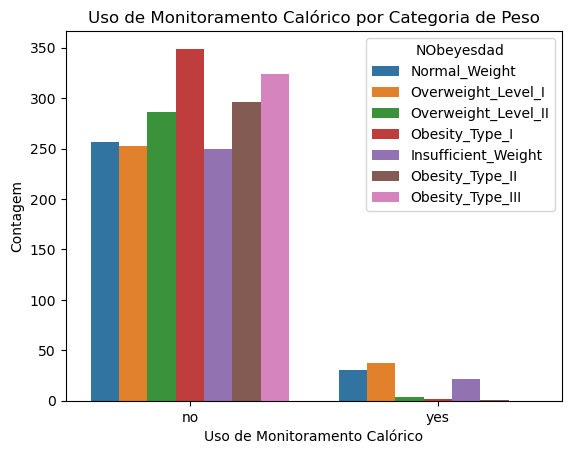

In [15]:
# Uso de monitoramento calórico por categoria de peso
sns.countplot(x='SCC', hue='NObeyesdad', data=df)
plt.title('Uso de Monitoramento Calórico por Categoria de Peso')
plt.xlabel('Uso de Monitoramento Calórico')
plt.ylabel('Contagem')
plt.show()

A maioria dos participantes consome alimentos com alto teor calórico, especialmente em um contexto de sobrepeso e obesidade, a análise sugere uma forte correlação entre hábitos alimentares e o estado nutricional da amostra. Essa evidência poderia ser um alerta para a implementação de estratégias de saúde pública voltadas para a promoção de hábitos alimentares mais equilibrados e de atividade física regular, visando à prevenção do sobrepeso e das doenças associadas.

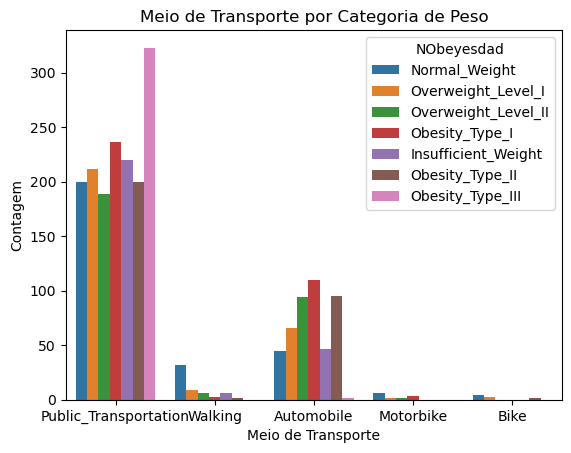

In [16]:
# Meio de transporte por categoria de peso
sns.countplot(x='MTRANS', hue='NObeyesdad', data=df)
plt.title('Meio de Transporte por Categoria de Peso')
plt.xlabel('Meio de Transporte')
plt.ylabel('Contagem')
plt.show()

A análise do uso predominante de automóvel e transporte público sobre meios de transporte ativos (bicicleta e caminhada) reflete padrões que podem ser influenciados pela infraestrutura urbana, políticas de mobilidade e hábitos culturais. Para melhorar a saúde pública, reduzir a poluição e promover um estilo de vida mais ativo, é crucial investir em infraestrutura cicloviária e pedonal e promover a adoção de formas de transporte sustentáveis. Isso, além de reduzir o congestionamento urbano, pode melhorar a qualidade de vida das pessoas e beneficiar o meio ambiente.

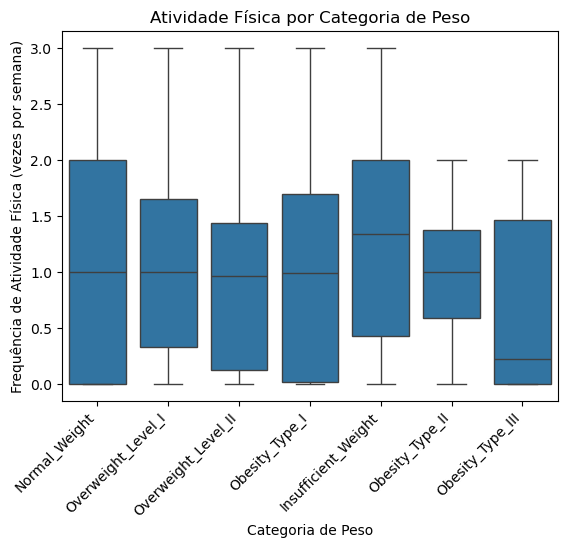

In [17]:
# Atividade física (FAF)
sns.boxplot(x='NObeyesdad', y='FAF', data=df)
plt.title('Atividade Física por Categoria de Peso')
plt.xlabel('Categoria de Peso')
plt.ylabel('Frequência de Atividade Física (vezes por semana)')
plt.xticks(rotation=45, ha='right')
plt.show()

## 5. Análise de Histórico Familiar
##### Explorando a relação entre o histórico familiar de sobrepeso e a obesidade.

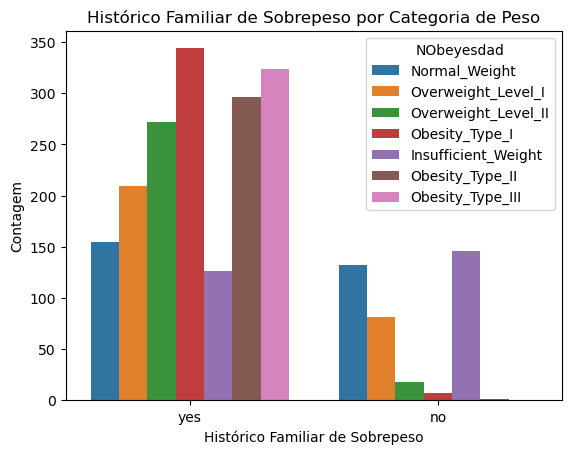

In [18]:
sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=df)
plt.title('Histórico Familiar de Sobrepeso por Categoria de Peso')
plt.xlabel('Histórico Familiar de Sobrepeso')
plt.ylabel('Contagem')
plt.show()

O alto número de respostas afirmativas sobre o histórico familiar de sobrepeso é um indicativo de que, além de fatores comportamentais e ambientais, existe uma significativa contribuição genética e familiar para o aumento do peso. Este fator destaca a necessidade de intervenções preventivas mais amplas, que considerem a dimensão familiar e genética na abordagem do sobrepeso e obesidade, além de políticas de saúde pública que promovam mudanças significativas nos hábitos alimentares e de atividade física desde a infância.

# Conclusão

A análise dos dados coletados nesta pesquisa revelou tendências preocupantes no que diz respeito ao estado nutricional da amostra. Um grande número de participantes apresenta excesso de peso, com uma alta prevalência de obesidade e sobrepeso, o que indica um risco aumentado de doenças crônicas como diabetes, hipertensão e doenças cardiovasculares. Esse resultado é especialmente relevante considerando que muitos dos entrevistados possuem histórico familiar de sobrepeso, sugerindo a existência de fatores genéticos e ambientais que contribuem para o desenvolvimento de problemas relacionados ao peso.

Além disso, os dados indicaram que a maioria dos participantes faz uso de transporte motorizado (automóveis ou transporte público), o que, aliado à baixa utilização de meios de transporte ativos como a bicicleta e caminhada, pode ser um indicativo de sedentarismo, fator diretamente relacionado ao aumento do peso corporal e outras comorbidades. Esse padrão de comportamento aponta para a necessidade de mudanças nas políticas públicas, com um foco maior na promoção de hábitos saudáveis, como a atividade física regular e a adoção de uma alimentação balanceada.

O fato de a maioria dos participantes também relatar histórico familiar de sobrepeso reforça a importância de intervenções precoces e estratégias educacionais focadas em modificar padrões de comportamento desde a infância, promovendo um estilo de vida mais saudável nas famílias. A educação e conscientização sobre os riscos da obesidade e sobre a importância da mobilidade ativa são fundamentais para combater esse problema crescente.